# MOwNiT - lab 7
## Dekompozycja spektralna

## Metoda potęgowa

In [101]:
import numpy as np
from scipy import linalg as spla
import time
from datetime import timedelta

In [102]:
def pow_method(A, epsilon=10e-10, max_iter=500):
    N = A.shape[0]
    xn = np.ones((N,1))
    xn_dominant = 1
    vals = []
    errs = []
    deduced_sign = 1
    for _ in range(max_iter):
        x0 = xn.copy()
        xn = A @ x0
        xn_dominant = np.max(np.abs(xn))
        if xn[0] * x0[0] < 0:
            deduced_sign = -1
            xn *= -1
        else:
            deduced_sign = 1
        vals += deduced_sign * xn_dominant
        xn /= np.abs(xn_dominant)
        diff = np.linalg.norm(xn - x0)
        errs.append(diff)
        if diff < epsilon:
            break
    xn /= np.linalg.norm(xn)
    xn = np.reshape(xn, newshape = N)
    return xn_dominant, xn , vals, errs

In [103]:
def my_pow_method_test(size):
    b = np.random.randint(100,500,size=(size,size))
    b_symm = (b + b.T)/2

    start_time = time.time()
    my_dominant_value, _, _, _ = pow_method(b_symm)
    end_time = time.time()
    print(f"My function execution time: {end_time - start_time}s")
    
    start_time = time.time()
    np_result = np.linalg.eig(b_symm)
    end_time = time.time()
    print(f"NumPy function execution time: {end_time - start_time}s")
    np_dominant_value_index = np.argmax(np_result[0])
    np_dominant_value = np_result[0][np_dominant_value_index]

    value_diff = np_dominant_value - my_dominant_value
    print(f"My eigenvalue relative error = {np.abs(value_diff/np_dominant_value)}")

In [104]:
for i in range(1,7):
    N = 100 * 5*i
    print("__________________________")
    print(f"Testing for matrix {N}x{N}")
    my_pow_method_test(N)

__________________________
Testing for matrix 500x500
My function execution time: 0.0005257129669189453s
NumPy function execution time: 0.09291815757751465s
My eigenvalue relative error = 3.988789595942898e-11
__________________________
Testing for matrix 1000x1000
My function execution time: 0.0011348724365234375s
NumPy function execution time: 0.4185917377471924s
My eigenvalue relative error = 3.965014491107554e-12
__________________________
Testing for matrix 1500x1500
My function execution time: 0.003713369369506836s
NumPy function execution time: 1.2703940868377686s
My eigenvalue relative error = 3.874976684327119e-13
__________________________
Testing for matrix 2000x2000
My function execution time: 0.0056531429290771484s
NumPy function execution time: 2.9695348739624023s
My eigenvalue relative error = 2.4806180784519463e-13
__________________________
Testing for matrix 2500x2500
My function execution time: 0.009274005889892578s
NumPy function execution time: 5.654892206192017s
M

## Inverse shifted power method

In [106]:
def inv_pow_method(A, sigma, epsilon=10e-12, max_iter = 500):
    N = A.shape[0]
    xn = np.ones((N,1))
    lup = spla.lu_factor(A - sigma*np.identity(N))
    vals = []
    errs = []
    deduced_sign = 1
    for _ in range(max_iter):
        x0 = xn.copy()
        xn = spla.lu_solve(lup, x0)
        if xn[0] * x0[0] < 0:
            deduced_sign = -1
            xn *= -1
        else:
            deduced_sign = 1
        
        xn_dominant = deduced_sign * np.max(np.abs(xn))
        vals.append(1/xn_dominant + sigma)
        xn /= np.abs(xn_dominant)
        
        diff = np.linalg.norm(x0 - xn)
        errs.append(diff)
        if diff < epsilon:
            break
    xn /= np.linalg.norm(xn)
    result = 1/xn_dominant + sigma
    return result, xn, vals, errs 

In [107]:
def my_inv_pow_test(size, delta=10000):
    b = np.random.randint(100,500,size=(size,size))
    b_symm = (b + b.T)/2
    
    start_time = time.time()
    np_result = np.linalg.eig(b_symm)
    end_time = time.time()
    print(f"NumPy function execution time: {end_time - start_time}s")
    np_index = np.argmin(np.abs(np_result[0] - delta))
    np_value = np_result[0][np_index]
    
    
    start_time = time.time()
    my_value, _, _, _ = inv_pow_method(b_symm, delta)
    end_time = time.time()
    print(f"My function execution time: {end_time - start_time}s")
    
    value_diff = np_value - my_value
    print(f"My eigenvalue relative error = {np.abs(value_diff / np_value)}")

In [108]:
for i in range(1,7):
    N = 100*5*i
    print("__________________________")
    print(f"Testing for matrix {N}x{N}")
    my_inv_pow_test(N)

__________________________
Testing for matrix 500x500
NumPy function execution time: 0.10024285316467285s
My function execution time: 0.045975685119628906s
My eigenvalue relative error = 4.295326784533479e-05
__________________________
Testing for matrix 1000x1000
NumPy function execution time: 0.4325089454650879s
My function execution time: 0.14356207847595215s
My eigenvalue relative error = 3.72948514807927e-07
__________________________
Testing for matrix 1500x1500
NumPy function execution time: 1.24644136428833s
My function execution time: 0.3549983501434326s
My eigenvalue relative error = 0.0002449823925246699
__________________________
Testing for matrix 2000x2000
NumPy function execution time: 2.8912675380706787s
My function execution time: 0.6388144493103027s
My eigenvalue relative error = 5.644731776226048e-10
__________________________
Testing for matrix 2500x2500
NumPy function execution time: 5.619881868362427s
My function execution time: 1.0172696113586426s
My eigenvalue r

## Inverse shifted power method with Rayleigh qutioent

In [109]:
def rayleigh(xn, x0):
    return (x0.T @ xn)[0,0]

def rayleigh_inv_pow_method(A, sigma, epsilon=10e-10, max_iter = 500):
    N = A.shape[0]
    A_prepared = A - sigma*np.identity(N)
    lup = spla.lu_factor(A_prepared)
    xn = np.ones((N,1))
    xn /= np.linalg.norm(xn)
    vals = []
    errs = []
    for _ in range(max_iter):
        x0 = xn.copy()
        xn = spla.lu_solve(lup, x0)
        inved_eig = rayleigh(xn, x0)
        eigval = sigma + 1/inved_eig
        vals.append(eigval)
        xn /= np.linalg.norm(xn)
        if inved_eig < 0:
            xn *= -1
        diff = np.linalg.norm(x0 - xn) 
        errs.append(diff)
        if diff < epsilon:
            break
    xn /= np.linalg.norm(xn)
    return eigval, xn, vals, errs

In [110]:
def my_rayleigh_inv_pow_test(size, delta=10000):
    b = np.random.randint(100,500,size=(size,size))
    b_symm = (b + b.T)/2
    
    start_time = time.time()
    np_result = np.linalg.eig(b_symm)
    end_time = time.time()
    print(f"NumPy function execution time: {end_time - start_time}s")
    np_index = np.argmin(np.abs(np_result[0] - delta))
    np_value = np_result[0][np_index]
    
    start_time = time.time()
    my_value, _, _, _ = rayleigh_inv_pow_method(b_symm, delta)
    end_time = time.time()
    print(f"My function execution time: {end_time - start_time}s")

    value_diff = np_value - my_value
    print(f"My eigenvalue relative error = {np.abs(value_diff / np_value)}")

In [111]:
for i in range(1,7):
    N = 100 * 5*i
    print("__________________________")
    print(f"Testing for matrix {N}x{N}")
    my_rayleigh_inv_pow_test(N)

__________________________
Testing for matrix 500x500
NumPy function execution time: 0.10802841186523438s
My function execution time: 0.041185617446899414s
My eigenvalue relative error = 2.3972184607274084e-09
__________________________
Testing for matrix 1000x1000
NumPy function execution time: 0.4210331439971924s
My function execution time: 0.1582949161529541s
My eigenvalue relative error = 3.0432150436471704e-09
__________________________
Testing for matrix 1500x1500
NumPy function execution time: 1.3439431190490723s
My function execution time: 0.34092211723327637s
My eigenvalue relative error = 1.698458199529304e-14
__________________________
Testing for matrix 2000x2000
NumPy function execution time: 2.9522452354431152s
My function execution time: 0.6535544395446777s
My eigenvalue relative error = 6.70555390819179e-15
__________________________
Testing for matrix 2500x2500
NumPy function execution time: 5.640456676483154s
My function execution time: 0.6345694065093994s
My eigenval

## Convergance Test
#### Blue - Inverse power method with Rayleigh quotient
#### Orange - Inverse power method

In [112]:
b = np.random.randint(100, 500, (500,500))
b_symm = (b + b.T) / 2

delta = 1000000

np_eigs = np.linalg.eig(b_symm)
np_index = np.argmin(np.abs(np_eigs[0] - delta))
example_eig = np_eigs[0][np_index]

_, _, vals_inv, errs_inv = inv_pow_method(b_symm, delta)
_, _, vals_ray, errs_ray = rayleigh_inv_pow_method(b_symm, delta)

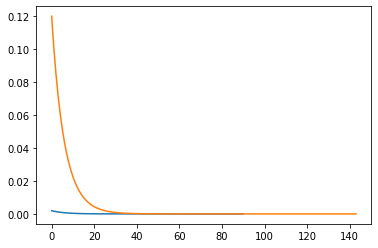

In [113]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(errs_ray)
plt.plot(errs_inv)
plt.show()

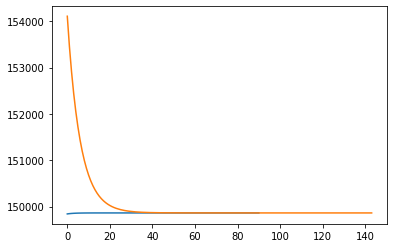

In [114]:
plt.close()
plt.plot(vals_ray)
plt.plot(vals_inv)
plt.show()